In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow
from tensorflow import keras

2024-02-09 11:26:57.327457: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-09 11:26:57.327569: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-09 11:26:57.495677: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten
from glob import glob
from keras.applications.resnet50 import ResNet50

In [5]:
train_path='/kaggle/input/cotton-disease-dataset/Cotton Disease/train'
validation_path='/kaggle/input/cotton-disease-dataset/Cotton Disease/val'

In [6]:
image_size=[224,224]

In [7]:
resnet=ResNet50(weights='imagenet',input_shape=image_size+[3],include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [8]:
for layer in resnet.layers:
    layer.trainable=False

In [9]:
folders=glob('/kaggle/input/cotton-disease-dataset/Cotton Disease/train/*')

In [10]:
len(folders)

4

In [11]:
x=Flatten()(resnet.output)

In [12]:
from keras.models import Model

In [13]:
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=resnet.input,outputs=prediction)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [15]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [16]:
from keras.applications.resnet50 import preprocess_input

In [17]:
train_datagen=ImageDataGenerator(rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

validation_datagen=ImageDataGenerator(rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

In [18]:
training_set=train_datagen.flow_from_directory(directory=train_path,target_size=(224,224),
                                              batch_size=32,class_mode='categorical')

validation_set=validation_datagen.flow_from_directory(directory=validation_path,target_size=(224,224),
                                              batch_size=32,class_mode='categorical')

Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.


In [20]:
r=model.fit(training_set,validation_data=validation_set,epochs=5)

Epoch 1/5
61/61 [==============================] - 33s 532ms/step - loss: 2.0777 - accuracy: 0.8657 - val_loss: 1.6933 - val_accuracy: 0.8972
Epoch 2/5
61/61 [==============================] - 29s 477ms/step - loss: 1.7636 - accuracy: 0.9021 - val_loss: 1.8115 - val_accuracy: 0.8933
Epoch 3/5
61/61 [==============================] - 29s 475ms/step - loss: 1.8791 - accuracy: 0.8939 - val_loss: 1.5749 - val_accuracy: 0.8972
Epoch 4/5
61/61 [==============================] - 29s 481ms/step - loss: 1.8974 - accuracy: 0.9062 - val_loss: 2.5779 - val_accuracy: 0.8538
Epoch 5/5
61/61 [==============================] - 29s 479ms/step - loss: 2.1025 - accuracy: 0.9021 - val_loss: 3.1630 - val_accuracy: 0.8577


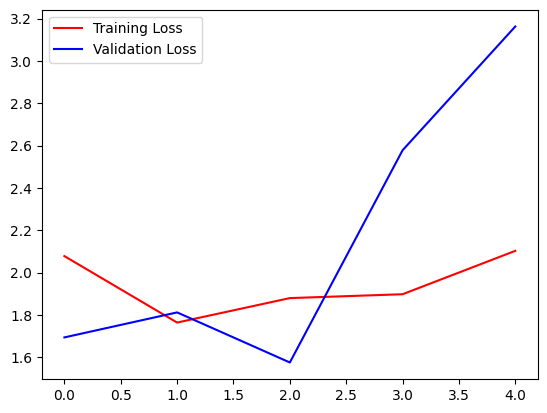

In [24]:
plt.plot(r.history['loss'],label='Training Loss',color='red')
plt.plot(r.history['val_loss'],label='Validation Loss',color='blue')
plt.legend()
plt.show()

In [25]:
from keras.models import load_model

In [26]:
model.save('model_resnet50.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
y_pred=model.predict(validation_set)

8/8 [==============================] - 4s 402ms/step


In [28]:
y_pred=np.argmax(y_pred,axis=1)

In [29]:
y_pred

array([0, 0, 3, 2, 1, 3, 1, 3, 2, 1, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1,
       0, 1, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 1, 2, 2, 1, 3,
       3, 2, 1, 1, 3, 2, 3, 3, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 3,
       1, 1, 3, 2, 0, 1, 1, 0, 1, 2, 1, 1, 1, 3, 1, 1, 1, 0, 1, 2, 2, 0,
       2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 1, 2, 3, 2, 1, 1, 2, 2, 3, 2,
       1, 0, 2, 3, 2, 1, 3, 0, 2, 3, 1, 2, 1, 1, 2, 1, 0, 0, 2, 1, 2, 3,
       1, 1, 2, 2, 2, 0, 2, 3, 2, 1, 3, 2, 0, 0, 3, 1, 2, 1, 0, 0, 0, 1,
       3, 0, 0, 1, 2, 2, 0, 3, 3, 1, 1, 0, 2, 3, 1, 1, 1, 1, 1, 2, 1, 3,
       1, 1, 2, 1, 0, 3, 0, 0, 2, 3, 1, 1, 3, 1, 1, 1, 3, 2, 1, 0, 3, 1,
       2, 0, 2, 3, 3, 1, 1, 1, 3, 1, 1, 1, 0, 3, 3, 0, 3, 1, 1, 1, 0, 0,
       3, 3, 3, 1, 3, 3, 1, 0, 2, 2, 2, 2, 3, 2, 3, 3, 1, 2, 1, 1, 2, 0,
       3, 3, 2, 3, 3, 2, 3, 1, 2, 3, 1])

In [30]:
import cv2

In [31]:
test_img=cv2.imread('/kaggle/input/cotton-disease-dataset/Cotton Disease/val/diseased cotton plant/dd (111)_iaip.jpg')

In [33]:
test_img=cv2.resize(test_img,(224,224))

In [34]:
test_input=test_img.reshape(1,224,224,3)

In [35]:
model.predict(test_input)

1/1 [==============================] - 2s 2s/step


array([[0.000000e+00, 1.000000e+00, 0.000000e+00, 9.323938e-24]],
      dtype=float32)

In [36]:
categories=['diseased cotton leaf','diseased cotton plant','fresh cotton leaf','fresh cotton plant']

In [37]:
pred_name=categories[np.argmax(model.predict(test_input))]
pred_name

1/1 [==============================] - 0s 24ms/step


'diseased cotton plant'